### 라이브러리 불러오기

In [ ]:
#시각화 글꼴 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,307 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and dire

In [ ]:
#필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import seaborn as sns

In [ ]:


#plotly 시각화 라이브러리
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots #서브플롯 제작

pd.set_option('display.max_columns', None)
#warning 알림 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.rc('font', family='NanumBarunGothic')
# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

### 거주지 전처리

In [ ]:
거주지 = pd.read_excel("/content/drive/Othercomputers/내 노트북/DNA/교내통계자료분석대회/거주지.xlsx")

In [ ]:
거주지['거주지'].unique()

array(['경기도 수원시', '서울특별시 관악구', '경기도 용인시 ', '인천광역시 계양구', '서울특별시 강서구',
       '서울특별시 양천구', '경기도 안산시', '서울특별시 서대문구', '경기도 화성시', '경기도 오산시',
       '경기도 파주시', '서울특별시 금천구', '경기도 광명시', '서울특별시 마포구', '서울특별시 은평구',
       '서울특별시 송파구', '충청남도 천안시', '서울특별시 동작구', '서울특별시 광진구', '서울특별시 강남구',
       '경기도 광주시', '경기도 용인시', '경남도 고양시', '경기도 평택시 ', '경기도 성남시', '경기도 부천시',
       '서울특별시 영등포구', '경기도 군포시', '서울특별시 노원구', '경기도 시흥시', '경기도 고양시',
       '경기도 구리시 ', '인천광역시 서구', '서울특별시 구로구', '경기도 평택시', '경기도 하남시',
       '인천특별시 남동구', '경기도 시흥시 ', '인천특별시 광동구', '인천광역시 부평구', '인천광역시 연수구',
       '경기도 김포시', '경기도 화성시 '], dtype=object)

In [ ]:
result_df = pd.DataFrame(거주지['거주지'].value_counts())

result_df.reset_index(inplace=True)

# If you want to rename the columns, you can do that here.
result_df = result_df.rename(columns={'Count': '인원수'})

# Display the DataFrame.
result_df

,거주지,count
0,경기도 수원시,23
1,경기도 용인시,7
2,경기도 화성시,6
3,서울특별시 송파구,4
4,경기도 안산시,4
5,서울특별시 서대문구,4
6,서울특별시 은평구,3
7,서울특별시 강서구,3
8,서울특별시 양천구,3
9,서울특별시 관악구,3


In [ ]:
result_df.to_excel("거주지 인원수.xlsx", index=False)

### 설문조사 EDA

In [ ]:
survey = pd.read_excel("/content/drive/Othercomputers/내 노트북/DNA/교내통계자료분석대회/설문자료.xlsx",sheet_name="설문지 응답 시트1")

In [ ]:
survey.columns

Index(['1-1. 귀하의 성별은 무엇입니까?', '1-2. 귀하의 학년은 어떻게 되십니까?',
       '1-3. 귀하의 학번은 어떻게 되십니까?\n예시) 22학번 중 22', '1-4. 귀하는 어느 단과대학 소속입니까?',
       '1-5. 귀하의 거주지는 어디인가요?(시군구까지)\n예시) 경기도 수원시, 서울특별시 강동구',
       '2-1. 통학 시 이동 수단이 몇 가지인가요?', '2-2. 통학 시 가장 많이 이용하는 이동 수단이 어떻게 되나요?',
       '2-3. 통학 시 두 번째로 많이 이용하는 이동 수단이 어떻게 되나요?',
       '2-4. 통학 시 세 번째로 많이 이용하는 이동 수단이 어떻게 되나요?', '2-5. 통학 시 소요시간이 얼마나 되나요? ',
       '2-6.한 달 왕복 통학 비용이 얼마 정도 소요되나요?(대략적인 비용)\n예시) 10 → 10',
       '2-7. 현재 통학 환경에 만족하시나요?\n1~5에서 만족 정도에 답변해주세요.',
       '2-8. 통학 환경에 가장 큰 영향을 주는 요소가 무엇인가요?',
       '2-9. 등/하교 대중교통 이용 시 가장 불편한 점은 무엇인가요?',
       '2-10. 경기대학교의 통학 문제 해결을 위해 가장 필요한 것은 무엇인가요?', '셔틀버스 이용',
       '(등교) 통학 셔틀 버스 이용 시 어떤 노선을 이용하시나요?',
       '(등교) 통학 셔틀 버스 운영 시간대가 적절하다고 느끼나요?', '(등교) 통학 셔틀 버스 요금의 체감 정도가 어떤가요?',
       '(등교) 통학 셔틀 버스 탑승권 확보 어려움의 정도는 어떤가요?',
       '(등교) 통학 셔틀 버스에 대한 종합적인 만족도는 어떤가요?', '등교 시에만 이용하나요?',
       '(하교) 통학 셔틀 버스 이용 시 어떤 노선을 이용하시나요?',
       '(하교) 통학 셔틀 버스 운영 시간대가 적절하다고 느끼나요?', '(하교) 통학 셔틀

In [ ]:
survey.rename(columns={'1-1. 귀하의 성별은 무엇입니까?':"성별", '1-2. 귀하의 학년은 어떻게 되십니까?':"학년",
       '1-3. 귀하의 학번은 어떻게 되십니까?\n예시) 22학번 중 22':"학번", '1-4. 귀하는 어느 단과대학 소속입니까?':"단과대학소속",
       '1-5. 귀하의 거주지는 어디인가요?(시군구까지)\n예시) 경기도 수원시, 서울특별시 강동구':"거주지",
       '2-1. 통학 시 이동 수단이 몇 가지인가요?':"이동수단 가지수", '2-2. 통학 시 가장 많이 이용하는 이동 수단이 어떻게 되나요?':"이동수단(1)",
       '2-3. 통학 시 두 번째로 많이 이용하는 이동 수단이 어떻게 되나요?':"이동수단(2)",
       '2-4. 통학 시 세 번째로 많이 이용하는 이동 수단이 어떻게 되나요?':"이동수단(3)", '2-5. 통학 시 소요시간이 얼마나 되나요? ':"통학 소요시간",
       '2-6.한 달 왕복 통학 비용이 얼마 정도 소요되나요?(대략적인 비용)\n예시) 10 → 10':"한달 왕복 통학비용",
       '2-7. 현재 통학 환경에 만족하시나요?\n1~5에서 만족 정도에 답변해주세요.':"통학 환경 만족도",
       '2-8. 통학 환경에 가장 큰 영향을 주는 요소가 무엇인가요?':"통학 환경 영향 요소",
       '2-9. 등/하교 대중교통 이용 시 가장 불편한 점은 무엇인가요?':"대중교통 이용시 불편한 점",
       '2-10. 경기대학교의 통학 문제 해결을 위해 가장 필요한 것은 무엇인가요?':"통학 문제해결을 위해 가장 필요한 것", '셔틀버스 이용':"셔틀버스 이용 여부",
       '(등교) 통학 셔틀 버스 이용 시 어떤 노선을 이용하시나요?':"(등교)이용노선",
       '(등교) 통학 셔틀 버스 운영 시간대가 적절하다고 느끼나요?':"(등교)적절 운영시간대", '(등교) 통학 셔틀 버스 요금의 체감 정도가 어떤가요?':"(등교)셔틀버스요금체감도",
       '(등교) 통학 셔틀 버스 탑승권 확보 어려움의 정도는 어떤가요?':"(등교)셔틀버스탑승권확보어려움",
       '(등교) 통학 셔틀 버스에 대한 종합적인 만족도는 어떤가요?':"(등교)종합적 만족도",
       '(하교) 통학 셔틀 버스 이용 시 어떤 노선을 이용하시나요?':"(하교)이용노선",
       '(하교) 통학 셔틀 버스 운영 시간대가 적절하다고 느끼나요?':"(하교)적절 운영시간대", '(하교) 통학 셔틀 버스 요금의 체감 정도가 어떤가요?':"(하교)셔틀버스요금체감도",
       '(하교) 통학 셔틀 버스 탑승권 확보 어려움의 정도는 어떤가요?':"(하교)셔틀버스탑승권확보어려움",
       '(하교) 통학 셔틀 버스에 대한 종합적인 만족도는 어떤가요?':"(하교)종합적 만족도", '셔틀버스 노선 확대가 필요하다고 생각하나요?':"셔틀버스노선확대 필요정도",
       '셔틀버스 노선 확대 시 어떤 노선이 신설되었으면 하나요?\n예시) 수원역, oo시, oo구':"셔틀버스 신설 노선",
       '셔틀버스 시간대 확대가 필요하다고 생각하나요?':"셔틀버스 시간대 확대 필요정도",
       '셔틀버스 운영시간 확대 시 어떤 시간에 운영했으면 하나요?\n예시) 13시, 14시 30분':"셔틀버스 신설 운영 시간대"}, inplace=True)

In [ ]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   성별                    101 non-null    object 
 1   학년                    101 non-null    object 
 2   학번                    101 non-null    int64  
 3   단과대학소속                101 non-null    object 
 4   거주지                   101 non-null    object 
 5   이동수단 가지수              101 non-null    object 
 6   이동수단(1)               101 non-null    object 
 7   이동수단(2)               101 non-null    object 
 8   이동수단(3)               101 non-null    object 
 9   통학 소요시간               101 non-null    object 
 10  한달 왕복 통학비용            101 non-null    float64
 11  통학 환경 만족도             101 non-null    int64  
 12  통학 환경 영향 요소           101 non-null    object 
 13  대중교통 이용시 불편한 점        101 non-null    object 
 14  통학 문제해결을 위해 가장 필요한 것  101 non-null    object 
 15  셔틀버스 이용 여부            1

In [ ]:
survey.describe()

,학번,한달 왕복 통학비용,통학 환경 만족도,(등교)적절 운영시간대,(등교)셔틀버스요금체감도,(등교)셔틀버스탑승권확보어려움,(등교)종합적 만족도,(하교)적절 운영시간대,(하교)셔틀버스요금체감도,(하교)셔틀버스탑승권확보어려움,(하교)종합적 만족도
count,101.000000,101.000000,101.000000,18.000000,18.000000,18.000000,18.000000,11.000000,11.000000,11.000000,11.000000
mean,21.801980,223.014851,2.584158,2.833333,3.611111,2.611111,3.166667,3.090909,3.818182,1.727273,3.000000
std,1.886901,2148.366400,1.185473,1.248529,0.916444,1.334558,0.857493,1.578261,0.873863,1.272078,0.894427
min,16.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,21.000000,6.000000,2.000000,2.000000,3.250000,2.000000,3.000000,1.500000,3.500000,1.000000,3.000000
50%,22.000000,10.000000,2.000000,3.000000,4.000000,2.000000,3.000000,4.000000,4.000000,1.000000,3.000000
75%,23.000000,10.000000,4.000000,4.000000,4.000000,3.750000,4.000000,4.000000,4.000000,2.000000,3.500000
max,24.000000,21600.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000


시각화 목록 \
[단변량 시각화]
1. 만족도 관련
- (완료) 통학 환경 만족도 -> 통학 환경 영향 요소
- 셔틀버스: 종합적 만족도
2. 셔틀 버스 관련
 - (완료)틀 버스 신설 희망 노선[word cloud]
 - (완료)셔틀버스 신설 운영 시간대[word cloud]  \

< 결론에 쓰면 좋을 것 같은 시각화>
- (완료) 운영시간대 관련
- (완료) 이용 노선 관련
- 셔틀버스 탑승권 확보 어려움

3. 기본 인적 정보 관련
- 상위 거주지
- (완료) 이동수단 관련 [treemap]
- (완료) 통학 소요시간[histogram]
- (완료) 대중교통 이용시 불편 요소[wordcloud]
- (완료) 통학 문제 해결을 위해 필요한 것 [wordcloud]

[이변량 시각화]
- (완료) 셔틀버스 이용 여부에 따른 통학 만족도
- (완료) 이동수단 수에 따른 통학 비용

[다변량 시각화]
- 이동수단과 통학 소요시간, 통학비용의 관계 (heatmap or scatter plot)
- 거주지별 셔틀버스 이용여부와 만족도 (facet grid)

In [ ]:
!pip install wordcloud

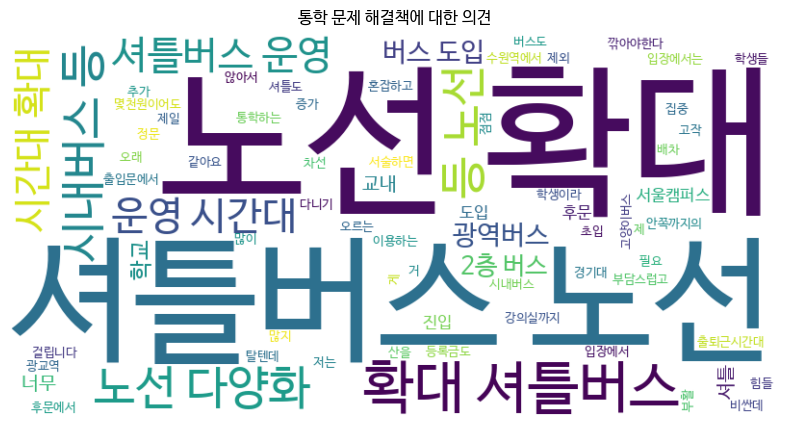

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


# 결측치 제거
text_data = survey['통학 문제해결을 위해 가장 필요한 것'].dropna()

# 모든 텍스트를 하나의 문자열로 변환
text = ' '.join(text_data)

# 워드클라우드 생성
wordcloud = WordCloud(font_path="NanumBarunGothic",width=800, height=400, background_color='white').generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title("통학 문제 해결책에 대한 의견")
plt.show()

In [ ]:
survey.columns

Index(['성별', '학년', '학번', '단과대학소속', '거주지', '이동수단 가지수', '이동수단(1)', '이동수단(2)',
       '이동수단(3)', '통학 소요시간', '한달 왕복 통학비용', '통학 환경 만족도', '통학 환경 영향 요소',
       '대중교통 이용시 불편한 점', '통학 문제해결을 위해 가장 필요한 것', '셔틀버스 이용 여부', '(등교)이용노선',
       '(등교)적절 운영시간대', '(등교)셔틀버스요금체감도', '(등교)셔틀버스탑승권확보어려움', '(등교)종합적 만족도',
       '등교 시에만 이용하나요?', '(하교)이용노선', '(하교)적절 운영시간대', '(하교)셔틀버스요금체감도',
       '(하교)셔틀버스탑승권확보어려움', '(하교)종합적 만족도', '셔틀버스노선확대 필요정도', '셔틀버스 신설 노선',
       '셔틀버스 시간대 확대 필요정도', '셔틀버스 신설 운영 시간대'],
      dtype='object')

In [ ]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('Paired')
colors = cmap(range(len(transport_mode_counts))) # 범주 개수만큼 색상 가져오기

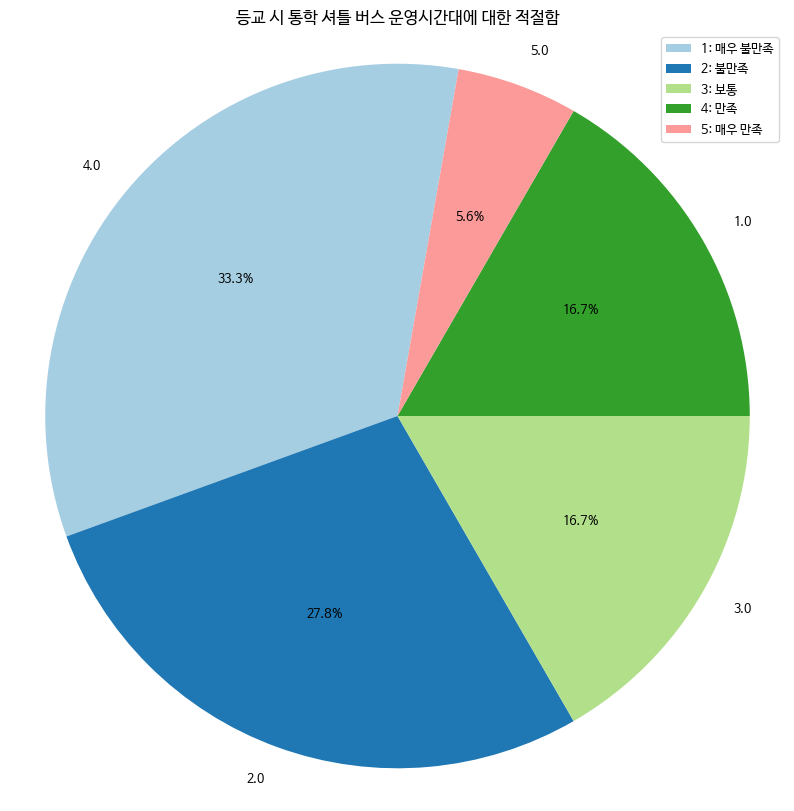

<Figure size 640x480 with 0 Axes>

In [ ]:
# 각 범주형 데이터의 빈도 계산
category_counts = survey['(등교)적절 운영시간대'].value_counts()
labels = ['1: 매우 불만족', '2: 불만족', '3: 보통', '4: 만족', '5: 매우 만족']

# 파이차트 그리기
plt.figure(figsize=(10, 10))  # 차트 크기 설정
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=80,colors=colors, textprops={'fontsize':9})
plt.title('등교 시 통학 셔틀 버스 운영시간대에 대한 적절함')
plt.axis('equal')  # 파이차트가 원형으로 보이게 설정
plt.legend(labels, loc='best', fontsize=9)

plt.show()

plt.savefig('설문조사 참여자 학년.png', transparent = True)

In [ ]:
all_transport_modes = survey[['이동수단(1)', '이동수단(2)', '이동수단(3)']].values.flatten()

# 결측값(None 또는 NaN) 제거
all_transport_modes = [mode for mode in all_transport_modes if pd.notna(mode)]

# 빈도 계산
transport_mode_counts = pd.Series(all_transport_modes).value_counts()

In [ ]:
!pip install squarify # Install the squarify library
import squarify # Import the squarify library

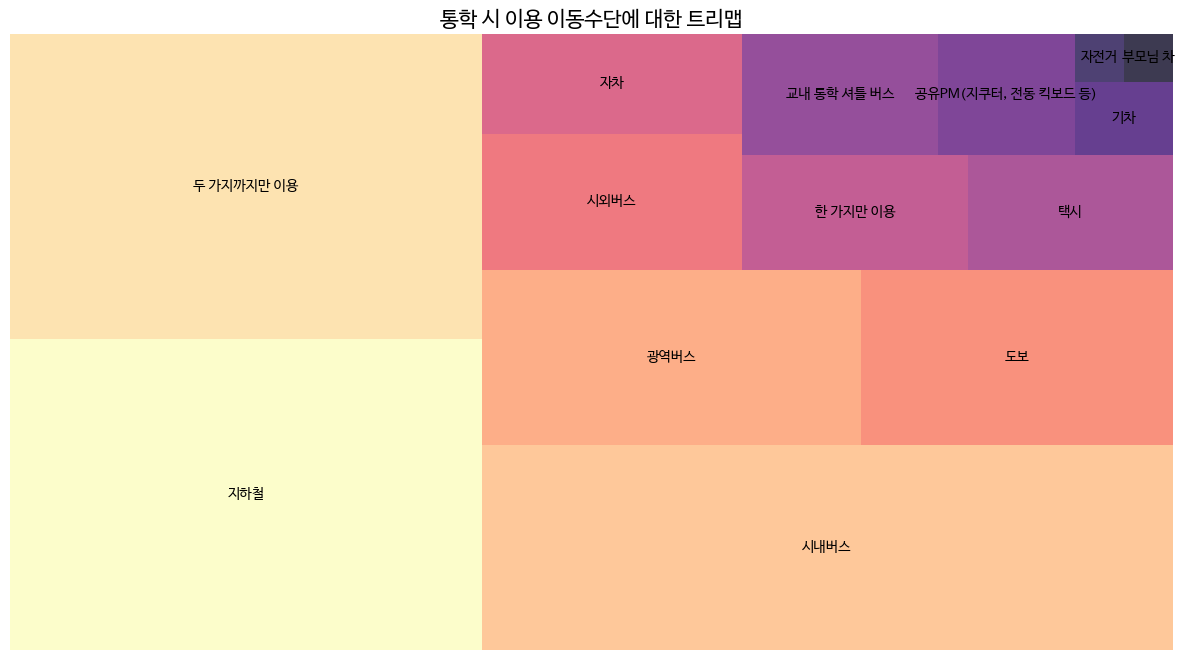

In [ ]:

plt.figure(figsize=(15, 8))
cmap = plt.get_cmap('magma_r')  # viridis, plasma, inferno, cividis 등 다양한 컬러맵 사용 가능
color = [cmap(i / len(transport_mode_counts)) for i in range(len(transport_mode_counts))]

# Assuming transport_mode_counts is a Pandas Series, access values using .values and index using .index
ax = squarify.plot(sizes=transport_mode_counts.values, label=transport_mode_counts.index, color=color, alpha=0.8)

plt.axis('off')  # 축 제거
plt.title('통학 시 이용 이동수단에 대한 트리맵', fontsize=15)
plt.show()

In [ ]:
!pip install pygwalker

In [ ]:
import pygwalker as pyg

In [ ]:
walker = pyg.walk(
    survey,
    spec="./chart_meta_0.json",    # 이 json 파일은 차트 상태를 저장하며, 차트를 완료하면 UI에서 수동으로 저장 버튼을 클릭해야 합니다. 'autosave'는 앞으로 지원될 예정입니다.
    kernel_computation=True,          # `kernel_computation=True`로 설정하면 pygwalker는 duckdb를 계산 엔진으로 사용하며, 이는 더 큰 데이터셋(<=100GB)을 탐색할 수 있습니다.
)

<Figure size 1000x600 with 0 Axes>

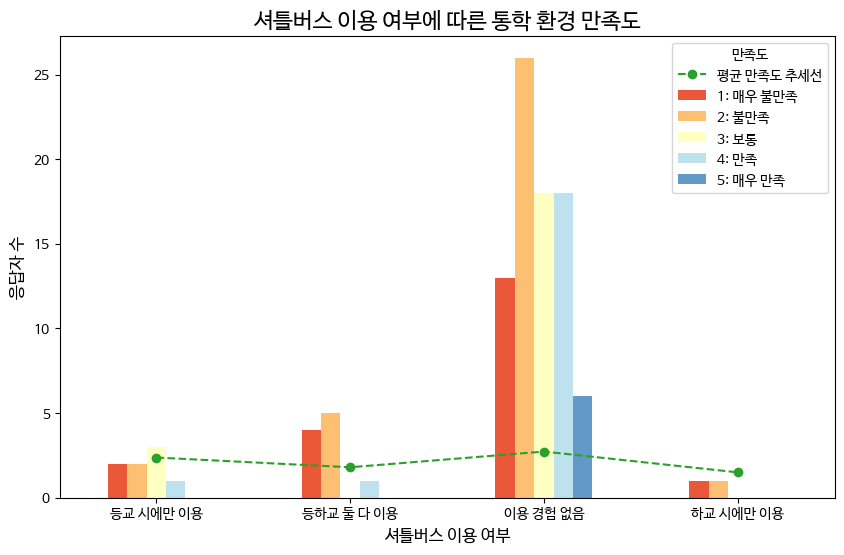

In [ ]:
grouped_data = survey.groupby(['셔틀버스 이용 여부', '통학 환경 만족도']).size().unstack()

labels = ['1: 매우 불만족', '2: 불만족', '3: 보통', '4: 만족', '5: 매우 만족']
mean_satisfaction = survey.groupby('셔틀버스 이용 여부')['통학 환경 만족도'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=False, color=sns.color_palette('RdYlBu', n_colors=5), figsize=(10,6))
plt.plot(mean_satisfaction.index, mean_satisfaction.values, color='tab:green', marker='o', linestyle='--', label='평균 만족도 추세선')

# 그래프 제목과 축 레이블 추가
plt.title('셔틀버스 이용 여부에 따른 통학 환경 만족도', fontsize=16)
plt.xlabel('셔틀버스 이용 여부', fontsize=12)
plt.ylabel('응답자 수', fontsize=12)

plt.legend(['평균 만족도 추세선']+labels, title='만족도', loc='upper right')

# 그래프 보여주기
plt.xticks(rotation=0)  # X축 라벨이 잘 보이게 설정
plt.show()


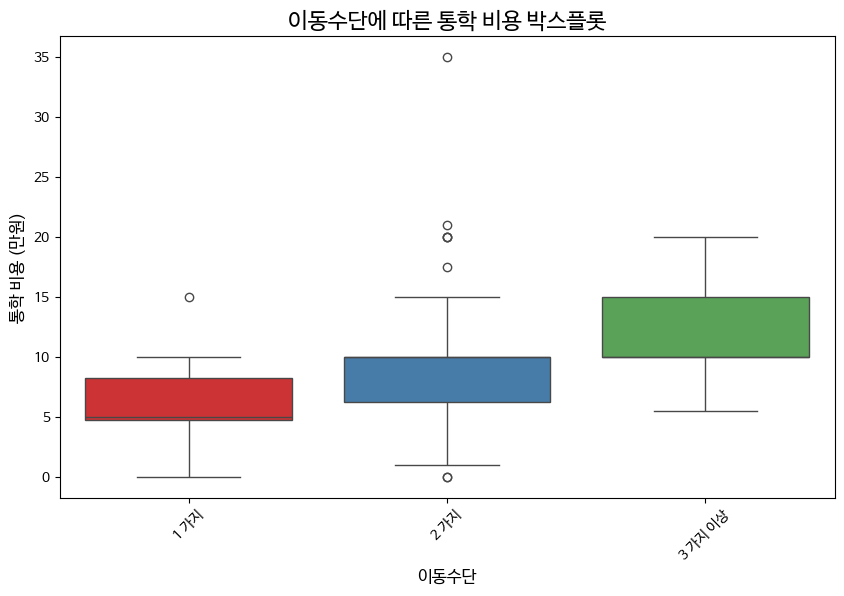

In [ ]:
plt.figure(figsize=(10, 6))

# 박스플롯
sns.boxplot(x='이동수단 가지수', y='한달 왕복 통학비용', data=survey, palette='Set1')
plt.title('이동수단에 따른 통학 비용 박스플롯', fontsize=16)
plt.xlabel('이동수단', fontsize=12)
plt.ylabel('통학 비용 (만원)', fontsize=12)
plt.xticks(rotation=45)  # 이동수단 라벨이 잘 보이게 회전
plt.show()

## 검정

In [ ]:
df = pd.read_excel("/content/drive/Othercomputers/내 노트북/DNA/교내통계자료분석대회/최종데이터프레임(설문조사 지역 반영).xlsx")

In [ ]:
df

,시군구,대중교통이용자인원(일반인),대중교통이용자인원(합계),정류장공급도,정류장수,출근시간 통행량 합계,점심시간 통행량 합계,퇴근시간 통행량 합계,20대거주인구,가정기반 통학,총교통수단OD,중심지,경기대까지의소요시간
0,경기도 고양시,206469,253977,17.1,2574,276974,135808,238930,72138,253,707,정발산역,122
1,경기도 광명시,67752,86898,54.5,642,104943,54909,94506,18600,815,2063,광명역,94
2,경기도 광주시,51668,65340,100.5,1223,70471,29078,54717,22592,0,6,경기광주역,75
3,경기도 군포시,63990,81706,45.3,524,112639,46321,98157,18010,158,405,산본역,64
4,경기도 김포시,65207,82596,44.2,1320,83008,41092,71609,27096,433,695,사우역,122
5,경기도 수원시,227026,262060,6.5,1441,313743,167335,300367,93404,836,1534,수원역,28
6,경기도 시흥시,67301,82951,31.8,1168,93495,40033,79549,34882,3159,4162,시흥대야역,94
7,경기도 안산시,93269,117925,13.9,1238,142916,64186,122099,50477,369,1643,안산중앙역,66
8,경기도 오산시,29806,37658,28.2,421,43135,19320,36945,16086,3422,7452,오산역,59
9,경기도 용인시,163535,208401,16.8,2582,214988,107820,192709,78056,33694,101742,기흥역,66


In [ ]:
X = ['대중교통이용자인원(합계)', '정류장공급도',
       '통행량 평균', '20대거주인구', '가정기반 통학']
Y = '경기대까지의소요시간'

In [ ]:
data = df[['정류장공급도',
       '통행량 평균', '20대거주인구', '가정기반 통학', '경기대까지의소요시간']]

KeyError: "['통행량 평균'] not in index"

In [ ]:
import scipy.stats as stats

for i in X:
    correlation_coefficient, p_value = stats.pearsonr(df[i], df[Y])
    print(i, "와 경기대학교까지의 소요시간과의 상관관계 계수:", correlation_coefficient, "유의수준:", p_value)

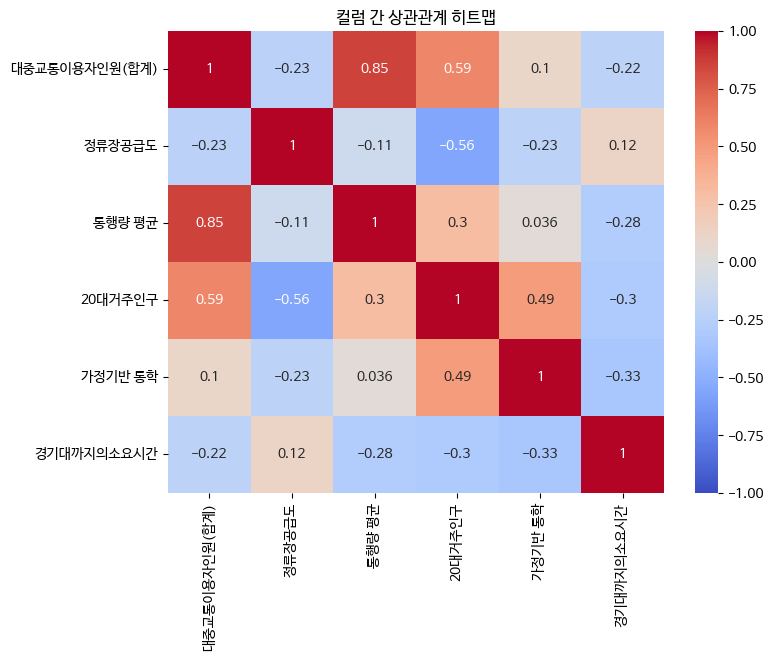

In [ ]:
# 컬럼 간 상관계수 계산
corr_matrix = data.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("컬럼 간 상관관계 히트맵")
plt.show()

In [ ]:
df['통행량 평균'] = (df['출근시간 통행량 합계'] + df['점심시간 통행량 합계'] + df['퇴근시간 통행량 합계']) / 3

In [ ]:
data = df[['정류장공급도',
       '통행량 평균', '20대거주인구', '가정기반 통학', '경기대까지의소요시간']]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 상수 추가 (회귀 분석에서 VIF 계산에 필요)
data_with_const = add_constant(data)

# VIF 계산
vif = pd.DataFrame()
vif["변수"] = data_with_const.columns
vif["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]

print(vif)

              변수        VIF
0          const  49.446065
1  대중교통이용자인원(합계)   8.161373
2         정류장공급도   1.534451
3         통행량 평균   5.716222
4        20대거주인구   4.072427
5        가정기반 통학   1.536934
6     경기대까지의소요시간   1.305064


대중교통이용자인원(합계) \
**정류장 공급도** \
**20대 거주인구** \
가정기반 통학 \
경기대 소요시간 \
통행량 합계?


In [ ]:
from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(data)

In [ ]:
features =data.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

values, vectors = np.linalg.eig(covariance_matrix)

print('\nEigenvalues \n%s '% values[:])
print('\nEigenvectros \n%s'  %  vectors[:])

[[ 1.03225806 -0.11491783 -0.57489734 -0.23301919  0.12791314]
 [-0.11491783  1.03225806  0.30909801  0.03686294 -0.29077781]
 [-0.57489734  0.30909801  1.03225806  0.50075081 -0.3124484 ]
 [-0.23301919  0.03686294  0.50075081  1.03225806 -0.34377116]
 [ 0.12791314 -0.29077781 -0.3124484  -0.34377116  1.03225806]]

Eigenvalues 
[2.2317666  0.33459071 0.59798916 1.0629892  0.93395465] 

Eigenvectros 
[[-0.44110101  0.45275849  0.41359441 -0.44993672 -0.47637828]
 [ 0.30490217 -0.2587755   0.3700026  -0.7030686   0.4570148 ]
 [ 0.58511912  0.75191993  0.18338126  0.179282    0.16273078]
 [ 0.45504455 -0.40004498  0.49065644  0.22223234 -0.58546351]
 [-0.40377548 -0.05123886  0.64627031  0.47087392  0.44153412]]


In [ ]:
eigenvector1

array([-0.44110101,  0.30490217,  0.58511912,  0.45504455, -0.40377548])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(data)
#principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# 데이터 불러오기
# data라는 데이터프레임이 준비되어 있다고 가정합니다.

# PCA 수행
pca = PCA(n_components=2)
pca.fit(data)

# 첫 번째 주성분의 고유 벡터 가져오기
eigenvector1 = pca.components_[0]

# 각 변수의 기여도 계산
contributions = pd.Series(eigenvector1**2 / sum(eigenvector1**2) * 100)

# 결과 출력
print("첫 번째 주성분(eigenvector1)에서 각 변수의 기여도 (%):")
print(contributions)

첫 번째 주성분(eigenvector1)에서 각 변수의 기여도 (%):
0    19.457010
1     9.296533
2    34.236439
3    20.706555
4    16.303464
dtype: float64


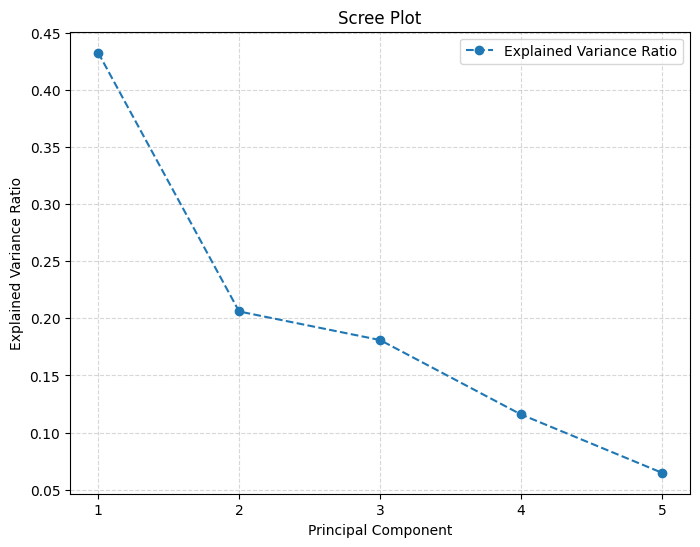

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

# 5. Scree Plot 그리기
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker='o',
    linestyle='--',
    label='Explained Variance Ratio'
)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
# 각 주성분의 분산 설명률
explained_variance_ratio = pca.explained_variance_ratio_

# 결과 출력
for i, ratio in enumerate(explained_variance_ratio):
    print(f"주성분 {i+1}의 분산 설명률: {ratio * 100:.2f}%")

주성분 1의 분산 설명률: 43.24%
주성분 2의 분산 설명률: 20.60%


In [ ]:

geometric_mean = np.prod(pairwise_matrix, axis=1) ** (1 / pairwise_matrix.shape[1])
def min_max_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

data_normalized = min_max_scaling(data)

In [ ]:
pairwise_matrix = np.array([
    [1,   2,   1/3, 1/5, 3],   # 정류장 공급도 기준으로 다른 요소와 비교
    [1/2, 1,   1/5, 1/7, 1/3], # 통행량 평균 기준으로 다른 요소와 비교
    [3,   5,   1,   1/2, 7],   # 20대 거주 인구 기준으로 다른 요소와 비교
    [5,   7,   2,   1,   8],   # 가정기반 통학 기준으로 다른 요소와 비교
    [1/3, 3,   1/7, 1/8, 1]    # 경기대까지의 소요시간 기준으로 다른 요소와 비교
])

print("쌍대비교 행렬:\n", pairwise_matrix)

쌍대비교 행렬:
 [[1.         2.         0.33333333 0.2        3.        ]
 [0.5        1.         0.2        0.14285714 0.33333333]
 [3.         5.         1.         0.5        7.        ]
 [5.         7.         2.         1.         8.        ]
 [0.33333333 3.         0.14285714 0.125      1.        ]]


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from scipy.linalg import eig

In [ ]:
# 일관성 비율 계산
def consistency_ratio(matrix):
    # 고유값 및 고유벡터 계산
    eigvals, eigvecs = eig(matrix)
    max_eigval = np.max(eigvals).real  # 최대 고유값
    n = matrix.shape[0]  # 행렬의 크기

    # 일관성 지수 CI 계산
    CI = (max_eigval - n) / (n - 1)

    # 무작위 지수(RI): AHP에서 사용하는 표준 값
    RI_dict = {1: 0.00, 2: 0.00, 3: 0.58, 4: 0.90, 5: 1.12, 6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45}
    RI = RI_dict[n]

    # 일관성 비율 CR 계산
    CR = CI / RI if RI != 0 else 0
    return CR

CR = consistency_ratio(pairwise_matrix)
print("일관성 비율(CR):", CR)


일관성 비율(CR): 0.06533688091437434


In [ ]:
def calculate_weights(matrix):
    eigvals, eigvecs = eig(matrix)
    max_eigval_index = np.argmax(eigvals)
    max_eigvec = eigvecs[:, max_eigval_index].real  # 실수 부분만 가져오기
    weights = max_eigvec / np.sum(max_eigvec)  # 가중치 정규화
    return weights

weights = calculate_weights(pairwise_matrix)
print("변수 가중치:\n", weights)

변수 가중치:
 [0.11385963 0.04806188 0.29855775 0.47337105 0.06614968]


In [ ]:
# AHP 점수 계산
data_normalized['AHP 점수'] = data_normalized.dot(weights)


ValueError: Dot product shape mismatch, (32, 6) vs (5,)

In [ ]:
data_normalized['시군구'] = df['시군구']
print("AHP 점수:\n", data_normalized[['시군구','AHP 점수']])

AHP 점수:
            시군구    AHP 점수
0      경기도 고양시  0.315363
1      경기도 광명시  0.133204
2      경기도 광주시  0.176597
3      경기도 군포시  0.090425
4      경기도 김포시  0.164679
5      경기도 수원시  0.332336
6      경기도 시흥시  0.199230
7      경기도 안산시  0.182515
8      경기도 오산시  0.099781
9     경기도 용인시   0.765124
10     경기도 파주시  0.193995
11     경기도 평택시  0.184094
12     경기도 하남시  0.108580
13     경기도 화성시  0.639108
14   서울특별시 강남구  0.275260
15   서울특별시 강서구  0.194324
16   서울특별시 관악구  0.229120
17   서울특별시 광진구  0.145022
18   서울특별시 구로구  0.139683
19   서울특별시 금천구  0.091405
20   서울특별시 노원구  0.213314
21   서울특별시 동작구  0.156161
22   서울특별시 마포구  0.169283
23  서울특별시 서대문구  0.136274
24   서울특별시 송파구  0.222791
25   서울특별시 양천구  0.151698
26  서울특별시 영등포구  0.160157
27   서울특별시 은평구  0.169872
28   인천광역시 계양구  0.114060
29   인천광역시 부평구  0.161651
30    인천광역시 서구  0.184663
31   인천광역시 연수구  0.112320


In [ ]:
sorted_data = data_normalized[['시군구', 'AHP 점수']].sort_values(by='AHP 점수', ascending=False)

# 결과 출력
print("AHP 점수를 기준으로 정렬된 데이터:")
print(sorted_data)

AHP 점수를 기준으로 정렬된 데이터:
           시군구    AHP 점수
9     경기도 용인시   0.765124
13     경기도 화성시  0.639108
5      경기도 수원시  0.332336
0      경기도 고양시  0.315363
14   서울특별시 강남구  0.275260
16   서울특별시 관악구  0.229120
24   서울특별시 송파구  0.222791
20   서울특별시 노원구  0.213314
6      경기도 시흥시  0.199230
15   서울특별시 강서구  0.194324
10     경기도 파주시  0.193995
30    인천광역시 서구  0.184663
11     경기도 평택시  0.184094
7      경기도 안산시  0.182515
2      경기도 광주시  0.176597
27   서울특별시 은평구  0.169872
22   서울특별시 마포구  0.169283
4      경기도 김포시  0.164679
29   인천광역시 부평구  0.161651
26  서울특별시 영등포구  0.160157
21   서울특별시 동작구  0.156161
25   서울특별시 양천구  0.151698
17   서울특별시 광진구  0.145022
18   서울특별시 구로구  0.139683
23  서울특별시 서대문구  0.136274
1      경기도 광명시  0.133204
28   인천광역시 계양구  0.114060
31   인천광역시 연수구  0.112320
12     경기도 하남시  0.108580
8      경기도 오산시  0.099781
19   서울특별시 금천구  0.091405
3      경기도 군포시  0.090425


In [ ]:
import numpy as np
import pandas as pd

# 데이터 불러오기
data = df[['시군구', '정류장공급도', '가정기반 통학', '20대거주인구', '통행량 평균', '경기대까지의소요시간']]

# 기준과 가중치 설정
criteria = [min, max, max, max, max]  # 거리(min)는 낮을수록 좋음
weights = [0.34236439, 0.09296533, 0.19457010, 0.16303464, 0.20706555]

# 데이터 준비
data_values = data.iloc[:, 1:].values  # "시군구" 열을 제외한 값들만 사용

# 1. 정규화 (Normalized Decision Matrix)
norm_data = data_values / np.sqrt((data_values ** 2).sum(axis=0))

# 2. 가중치 적용
weighted_data = norm_data * weights

# 3. 이상해 및 비이상해 솔루션 정의
ideal_best = []
ideal_worst = []

for j, criterion in enumerate(criteria):
    if criterion == max:
        ideal_best.append(np.max(weighted_data[:, j]))
        ideal_worst.append(np.min(weighted_data[:, j]))
    else:
        ideal_best.append(np.min(weighted_data[:, j]))
        ideal_worst.append(np.max(weighted_data[:, j]))

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

# 4. 이상해와의 거리 계산
dist_best = np.sqrt(((weighted_data - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((weighted_data - ideal_worst) ** 2).sum(axis=1))

# 5. 상대적 근접성 점수 계산
scores = dist_worst / (dist_best + dist_worst)

# 결과를 데이터프레임에 추가
df['TOPSIS_Score'] = scores
df['Rank'] = df['TOPSIS_Score'].rank(ascending=False)

# 전체 순위 출력 (지역 이름 포함)
sorted_df = df[['시군구',  'TOPSIS_Score', 'Rank']].sort_values(by='Rank', ascending=True)
sorted_df.reset_index(drop=True, inplace=True)  # 인덱스를 0부터 재설정

# 결과 확인
sorted_df

,시군구,TOPSIS_Score,Rank
0,경기도 용인시,0.702658,1.0
1,경기도 수원시,0.635158,2.0
2,경기도 고양시,0.612669,3.0
3,서울특별시 강남구,0.577197,4.0
4,경기도 화성시,0.564584,5.0
5,경기도 안산시,0.551996,6.0
6,서울특별시 송파구,0.541188,7.0
7,인천광역시 서구,0.529533,8.0
8,인천광역시 연수구,0.516704,9.0
9,경기도 평택시,0.509729,10.0


## 시각화 코드

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 라이브러리 설치 (필요 시 주석 해제 후 실행)
# !pip install pandas matplotlib seaborn plotly scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 그래프 스타일 설정 (seaborn 스타일 적용)
sns.set(style="whitegrid")
# y축에 과학적 표기법을 비활성화하기 위한 설정
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
# CSV 파일 불러오기
df1 = pd.read_excel('/content/전국_교통수단.xlsx')
df2 = pd.read_excel('/content/서울_교통수단2.xlsx')
df3 = pd.read_excel('/content/경기도_교통수단.xlsx')

filtered_df = df1[df1['교육정도별'].isin(['대학(4년제 미만)', '대학교(4년제 이상)'])]

filtered_df

summed_df = filtered_df.drop(columns=['교육정도별']).sum()

In [ ]:
# 칼럼별 value count 계산 후 막대 그래프 그리기
ax = summed_df.plot(kind='bar')

plt.ticklabel_format(style='plain', axis='y')

plt.title('전국 대학생 교통수단별 이용자 수', fontproperties=font_prop)
plt.xlabel('컬럼', fontproperties=font_prop)
plt.ylabel('값의 합계', fontproperties=font_prop)

plt.xticks(fontproperties=font_prop, rotation=45, ha='right')

plt.show()

In [ ]:
# 필터링된 행들에서 모든 칼럼별로 값 합계 구하기
summed_df = filtered_df.drop(columns=['교육정도별']).sum()

# y축에 과학적 표기법을 비활성화하기 위한 설정
plt.ticklabel_format(style='plain', axis='y')

ax = summed_df.plot(kind='bar')

max_value = summed_df.max()
plt.yticks(np.arange(0, max_value + 5000, 5000)) # 눈금 조정

plt.title('교육 수준별 컬럼 값 합계', fontproperties=font_prop)
plt.xlabel('컬럼', fontproperties=font_prop)
plt.ylabel('값의 합계', fontproperties=font_prop)

plt.xticks(fontproperties=font_prop, rotation=45, ha='right')  # 텍스트 회전 및 정렬 조정

plt.show()

In [ ]:
"""Y축을 5000으로 맞춰면 (다른 교통수단은 Y축이 5000단위라서) 저 딴 그래프 만들어짐."""

df2.head(6)

filtered_df2 = df2[df2['교육정도별'].isin(['대학(4년제 미만)', '대학교(4년제 이상)'])]
filtered_df2

summed_df2 = filtered_df2.drop(columns=['교육정도별']).sum()

plt.ticklabel_format(style='plain', axis='y')

summed_df2.plot(kind='bar')

plt.title('서울 대학생 교통수단별 이용자 수', fontproperties=font_prop)
plt.xlabel('칼럼', fontproperties=font_prop)
plt.ylabel('값의 합계', fontproperties=font_prop)

plt.xticks(fontproperties=font_prop, rotation=45, ha='right')  # 텍스트 회전 및 정렬 조정

plt.show()

In [ ]:
# df 교육정도별로 필터링
filtered_df3 = df3[df3['교육정도별'].isin(['대학(4년제 미만)', '대학교(4년제 이상)'])]
print(filtered_df3.head(3))

# 대학생의 통학인원만 시각화
summed_df3 = filtered_df3.drop(columns=['교육정도별']).sum()

plt.ticklabel_format(style='plain', axis='y')

summed_df3.plot(kind='bar')

plt.title('경기도 대학생 교통수단별 이용자 수', fontproperties=font_prop)
plt.xlabel('칼럼', fontproperties=font_prop)
plt.ylabel('값의 합계', fontproperties=font_prop)

plt.xticks(fontproperties=font_prop, rotation=45, ha='right')  # 텍스트 회전 및 정렬 조정

plt.show()

In [ ]:
# 수단별 통학시간 데이터: df4

df4 = pd.read_excel('/content/2023 통학시간 데이터.xlsx')

print(df4.head(2), '\n')

selected_columns = ['소계','거주시군내','도내다른 시군','서울','인천','기타']
filtered_df = df4[selected_columns]

print(filtered_df, '\n')

summed_df = filtered_df.sum()

plt.ticklabel_format(style='plain', axis='y')

summed_df.plot(kind='bar')

plt.title('지역별 통학 시간', fontproperties=font_prop)
plt.xlabel('칼럼', fontproperties=font_prop)
plt.ylabel('값의 합계', fontproperties=font_prop)

plt.xticks(fontproperties=font_prop, rotation=45, ha='right')  # 텍스트 회전 및 정렬 조정

plt.show()

In [ ]:
selected_columns = ['승용차','버스','전철 지하철','택시','기차','걸어서','자전거','승합차','기타.1']
filtered_df = df4[selected_columns]

print(filtered_df.head(5))

summed_df = filtered_df.sum()

plt.ticklabel_format(style='plain', axis='y')

summed_df.plot(kind='bar')

plt.title('교통수단별 통학시간', fontproperties=font_prop)
plt.xlabel('칼럼', fontproperties=font_prop)
plt.ylabel('값의 합계', fontproperties=font_prop)

plt.xticks(fontproperties=font_prop, rotation=45, ha='right')  # 텍스트 회전 및 정렬 조정

plt.show()

## TOPSIS 적용

In [ ]:
import numpy as np
import pandas as pd

# 데이터 불러오기
df = pd.read_excel('/content/찐 최종 데이터프레임 찐찐찐.xlsx')
data = df[['시군구', 'bus', 'home', 'twenty', 'mean', 'time']]

# 기준과 가중치 설정
criteria = [min, max, max, max, max]  # 거리(min)는 낮을수록 좋음
weights = [0.29855775 , 0.04806188, 0.11385963, 0.06614968, 0.47337105] # AHP로 지정한 가중치

# 데이터 준비
data_values = data.iloc[:, 1:].values  # "시군구" 열을 제외한 값들만 사용

# 1. 정규화 (Normalized Decision Matrix)
norm_data = data_values / np.sqrt((data_values ** 2).sum(axis=0))

# 2. 가중치 적용
weighted_data = norm_data * weights

# 3. 이상해 및 비이상해 솔루션 정의
ideal_best = []
ideal_worst = []

for j, criterion in enumerate(criteria):
    if criterion == max:
        ideal_best.append(np.max(weighted_data[:, j]))
        ideal_worst.append(np.min(weighted_data[:, j]))
    else:
        ideal_best.append(np.min(weighted_data[:, j]))
        ideal_worst.append(np.max(weighted_data[:, j]))

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

# 4. 이상해와의 거리 계산
dist_best = np.sqrt(((weighted_data - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((weighted_data - ideal_worst) ** 2).sum(axis=1))

# 5. 상대적 근접성 점수 계산
scores = dist_worst / (dist_best + dist_worst)

# 결과를 데이터프레임에 추가
df['TOPSIS_Score'] = scores
df['Rank'] = df['TOPSIS_Score'].rank(ascending=False)

# 전체 순위 출력 (지역 이름 포함)
sorted_df = df[['시군구', 'bus', 'home', 'twenty', 'mean', 'time', 'TOPSIS_Score', 'Rank']].sort_values(by='Rank', ascending=True)
sorted_df.reset_index(drop=True, inplace=True)  # 인덱스를 0부터 재설정

# 결과 확인
sorted_df

In [ ]:
"""가중치 : ahp로 도출된 가중치"""

# 엑셀로 저장
sorted_df.to_excel('/content/TOPSIS_결과.xlsx', index=False)

import numpy as np
import pandas as pd

# 데이터 불러오기
df = pd.read_excel('/content/찐 최종 데이터프레임 찐찐찐.xlsx')
data = df[['시군구', 'bus', 'home', 'twenty', 'mean', 'time']]

# 기준과 가중치 설정
criteria = [min, max, max, max, max]  # 거리(min)는 낮을수록 좋음
weights = [0.34236439, 0.09296533, 0.19457010, 0.16303464, 0.20706555]

# 데이터 준비
data_values = data.iloc[:, 1:].values  # "시군구" 열을 제외한 값들만 사용

# 1. 정규화 (Normalized Decision Matrix)
norm_data = data_values / np.sqrt((data_values ** 2).sum(axis=0))

# 2. 가중치 적용
weighted_data = norm_data * weights

# 3. 이상해 및 비이상해 솔루션 정의
ideal_best = []
ideal_worst = []

for j, criterion in enumerate(criteria):
    if criterion == max:
        ideal_best.append(np.max(weighted_data[:, j]))
        ideal_worst.append(np.min(weighted_data[:, j]))
    else:
        ideal_best.append(np.min(weighted_data[:, j]))
        ideal_worst.append(np.max(weighted_data[:, j]))

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

# 4. 이상해와의 거리 계산
dist_best = np.sqrt(((weighted_data - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((weighted_data - ideal_worst) ** 2).sum(axis=1))

# 5. 상대적 근접성 점수 계산
scores = dist_worst / (dist_best + dist_worst)

# 결과를 데이터프레임에 추가
df['TOPSIS_Score'] = scores
df['Rank'] = df['TOPSIS_Score'].rank(ascending=False)

# 전체 순위 출력 (지역 이름 포함)
sorted_df = df[['시군구', 'bus', 'home', 'twenty', 'mean', 'time', 'TOPSIS_Score', 'Rank']].sort_values(by='Rank', ascending=True)
sorted_df.reset_index(drop=True, inplace=True)  # 인덱스를 0부터 재설정

# 결과 확인
sorted_df

In [ ]:
# 엑셀로 저장
sorted_df.to_excel('/content/TOPSIS_결과2.xlsx', index=False)

"""가중치 : pca로 도출된 가중치"""

## AHP 적용

In [ ]:
df['통행량 평균'] = (df['출근시간 통행량 합계'] + df['점심시간 통행량 합계'] + df['퇴근시간 통행량 합계']) / 3

In [ ]:
data = df[['정류장공급도',
       '통행량 평균', '20대거주인구', '가정기반 통학', '경기대까지의소요시간']]

In [ ]:

geometric_mean = np.prod(pairwise_matrix, axis=1) ** (1 / pairwise_matrix.shape[1])
def min_max_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

data_normalized = min_max_scaling(data)

In [ ]:
pairwise_matrix = np.array([
    [1,   2,   1/3, 1/5, 3],   # 정류장 공급도 기준으로 다른 요소와 비교
    [1/2, 1,   1/5, 1/7, 1/3], # 통행량 평균 기준으로 다른 요소와 비교
    [3,   5,   1,   1/2, 7],   # 20대 거주 인구 기준으로 다른 요소와 비교
    [5,   7,   2,   1,   8],   # 가정기반 통학 기준으로 다른 요소와 비교
    [1/3, 3,   1/7, 1/8, 1]    # 경기대까지의 소요시간 기준으로 다른 요소와 비교
])

print("쌍대비교 행렬:\n", pairwise_matrix)

쌍대비교 행렬:
 [[1.         2.         0.33333333 0.2        3.        ]
 [0.5        1.         0.2        0.14285714 0.33333333]
 [3.         5.         1.         0.5        7.        ]
 [5.         7.         2.         1.         8.        ]
 [0.33333333 3.         0.14285714 0.125      1.        ]]


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from scipy.linalg import eig

In [ ]:
# 일관성 비율 계산
def consistency_ratio(matrix):
    # 고유값 및 고유벡터 계산
    eigvals, eigvecs = eig(matrix)
    max_eigval = np.max(eigvals).real  # 최대 고유값
    n = matrix.shape[0]  # 행렬의 크기

    # 일관성 지수 CI 계산
    CI = (max_eigval - n) / (n - 1)

    # 무작위 지수(RI): AHP에서 사용하는 표준 값
    RI_dict = {1: 0.00, 2: 0.00, 3: 0.58, 4: 0.90, 5: 1.12, 6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45}
    RI = RI_dict[n]

    # 일관성 비율 CR 계산
    CR = CI / RI if RI != 0 else 0
    return CR

CR = consistency_ratio(pairwise_matrix)
print("일관성 비율(CR):", CR)


일관성 비율(CR): 0.06533688091437434


In [ ]:
def calculate_weights(matrix):
    eigvals, eigvecs = eig(matrix)
    max_eigval_index = np.argmax(eigvals)
    max_eigvec = eigvecs[:, max_eigval_index].real  # 실수 부분만 가져오기
    weights = max_eigvec / np.sum(max_eigvec)  # 가중치 정규화
    return weights

weights = calculate_weights(pairwise_matrix)
print("변수 가중치:\n", weights)

변수 가중치:
 [0.11385963 0.04806188 0.29855775 0.47337105 0.06614968]


In [ ]:
# AHP 점수 계산
data_normalized['AHP 점수'] = data_normalized.dot(weights)


ValueError: Dot product shape mismatch, (32, 6) vs (5,)

In [ ]:
data_normalized['시군구'] = df['시군구']
print("AHP 점수:\n", data_normalized[['시군구','AHP 점수']])

AHP 점수:
            시군구    AHP 점수
0      경기도 고양시  0.315363
1      경기도 광명시  0.133204
2      경기도 광주시  0.176597
3      경기도 군포시  0.090425
4      경기도 김포시  0.164679
5      경기도 수원시  0.332336
6      경기도 시흥시  0.199230
7      경기도 안산시  0.182515
8      경기도 오산시  0.099781
9     경기도 용인시   0.765124
10     경기도 파주시  0.193995
11     경기도 평택시  0.184094
12     경기도 하남시  0.108580
13     경기도 화성시  0.639108
14   서울특별시 강남구  0.275260
15   서울특별시 강서구  0.194324
16   서울특별시 관악구  0.229120
17   서울특별시 광진구  0.145022
18   서울특별시 구로구  0.139683
19   서울특별시 금천구  0.091405
20   서울특별시 노원구  0.213314
21   서울특별시 동작구  0.156161
22   서울특별시 마포구  0.169283
23  서울특별시 서대문구  0.136274
24   서울특별시 송파구  0.222791
25   서울특별시 양천구  0.151698
26  서울특별시 영등포구  0.160157
27   서울특별시 은평구  0.169872
28   인천광역시 계양구  0.114060
29   인천광역시 부평구  0.161651
30    인천광역시 서구  0.184663
31   인천광역시 연수구  0.112320


In [ ]:
sorted_data = data_normalized[['시군구', 'AHP 점수']].sort_values(by='AHP 점수', ascending=False)

# 결과 출력
print("AHP 점수를 기준으로 정렬된 데이터:")
print(sorted_data)

AHP 점수를 기준으로 정렬된 데이터:
           시군구    AHP 점수
9     경기도 용인시   0.765124
13     경기도 화성시  0.639108
5      경기도 수원시  0.332336
0      경기도 고양시  0.315363
14   서울특별시 강남구  0.275260
16   서울특별시 관악구  0.229120
24   서울특별시 송파구  0.222791
20   서울특별시 노원구  0.213314
6      경기도 시흥시  0.199230
15   서울특별시 강서구  0.194324
10     경기도 파주시  0.193995
30    인천광역시 서구  0.184663
11     경기도 평택시  0.184094
7      경기도 안산시  0.182515
2      경기도 광주시  0.176597
27   서울특별시 은평구  0.169872
22   서울특별시 마포구  0.169283
4      경기도 김포시  0.164679
29   인천광역시 부평구  0.161651
26  서울특별시 영등포구  0.160157
21   서울특별시 동작구  0.156161
25   서울특별시 양천구  0.151698
17   서울특별시 광진구  0.145022
18   서울특별시 구로구  0.139683
23  서울특별시 서대문구  0.136274
1      경기도 광명시  0.133204
28   인천광역시 계양구  0.114060
31   인천광역시 연수구  0.112320
12     경기도 하남시  0.108580
8      경기도 오산시  0.099781
19   서울특별시 금천구  0.091405
3      경기도 군포시  0.090425
